# Практическая работа №3: Кластерный анализ
Выполнил студент гр. 0373 Карташов Никита. Вариант №10.

## Цель работы
Освоение основных понятий и некоторых методов кластерного анализа, в частности, метода k-means и метода поиска сгущений.

## Основные теоретические положения
Генеральная совокупность - множество реально или гипотетически существующих объектов или явлений, из которых тем или иным способом
формируется совокупность выборочная.

Выборочная совокупность - множество объектов, выбранных из генеральной совокупности.    

Ранжированный ряд - последовательность всех элементов выборки, расположенных в неубывающем порядке.     

Кластерный анализ − задача разбиения заданной выборки на подмножества, называемые кластерами, так, чтобы каждый кластер состоял из схожих объектов, а объекты разных кластеров существенно отличались. Это классификация объектов или событий в относительно гомогенные(однородные) группы - кластеры. Задача кластеризации относится к статистической обработке, а также широкому классу задач обучения без учителя.     
Требования для обрабатываемых данных: полнота, однородность.    

Нормализация признаков − метод приведения к новому диапазону. Применяется, когда нужно избавиться от большого разброса значений признаков.  
Метрика - неотрицательная вещественная функция, для которой справедливы коммутативность и правило треугольника:     
1) $d(x,y) \ge 0$ - расстояние неотрицательно   
2) $d(x,y)=d(y,x)$ - коммутативность    
3) $d(x,y) \le d(x,z) + d(z,y)$ - правило треугольника  

«Грубая» верхняя оценка количества кластеров − число, после которого увеличение количества кластеров нецелесообразно $\tilde k = \lfloor \sqrt{n/2}\rfloor$
Грубая верхняя оценка количества кластеров: $\widetilde{k}=\lfloor\sqrt{\frac{n}{2}}\rfloor$.   

Евклидово расстояние: $d(x,y) = \sqrt{\sum_{i=1}^n(x_i-y_i)^2}$     

Манхэттенское расстояние: $d(x,y) = \sum_{i=1}^n\vert{x_i-y_i}\vert$    

K-means - алгоритм кластеризации. На вход получает точки, количество кластеров, на которые требуется разбить входные данные, а также малое число эпсилон - $\epsilon$. Выбираются начальные центроиды. Затем на каждой итерации каждая точка относится к ближайшему кластеру - испольуется Евклидово расстояние - и вычисляется центр масс у каждого полученного кластера - это и есть новый центроид. Когда максимальное смещение центроида станет меньше числа эпсилон, выполнение алгоритма прекращается.

K-medoids - алгоритм кластеризации. На вход получает точки и количество кластеров, на которые требуется разбить входные данные. В отличие от алгоритма k-means используется не центр масс, а представительный объект - один из объектов кластера. Каждый из оставшихся объектов объединяется в кластер с ближайшим медоидом, используя любую метрику. В каждом кластере делаются попытки переместить медоид в другую точку. Считается разброс при каждой попытке перемещения. После всех попыток перемещения выбирается вариант с наименьшим разбросом, один медоид перемещается. Далее выполнение алгоритма продожается пока удаётся найти точку, перемещение медоида в которую уменьшает разброс.     

Разброс внутри кластера: $W_{C_i} = \sum_{x_i\in C_i}(x_i-x_{C_i})^2$, где ${C_i}$ — множество элементов, $x_{C_j}$ — центр кластера.   

Общий разброс: $W = \sum_{i=1}^kW_{C_i}$    

Метод локтя − метод выбора оптимального количества кластеров. Строится график, где на оси абсцисс — число кластеров, а на оси ординат — разброс при данном числе кластеров. Выбирается точка, после которой последующий разброс уменьшится с наименьшей степенью. Это и есть оптимальная оценка числа кластеров.    

Алгоритм поиска сгущений, или же FOREL − алгоритм кластеризации. На каждом шаге случайным образом выбирается объект из выборки, вокруг него раздувается сфера радиуса R, внутри этой сферы выбирается центр масс − это новый центр сферы. После того как центр сферы стабилизируется, все объекты, входящие в эту сферу, исключаются из дальнейшего рассмотрения для кластеризации. Алгоритм повторяется для некластеризованных точек до тех пор, пока все точки не будут кластеризованы.   
Радиус выбирается по следующему правилу: $R_{min}\lt R\lt R_{max}$      
Чтобы получить $R_{min}$ и $R_{max}$ строится матрица $D = \{d_{ij}\}_{i\gt j}$, где $d_{ij}=d(x_i,x_j)$    
$R_{min}=min\{ d_{ij}\gt 0\}$   
$R_{max}=max\{ d_{ij}\}$    

Чтобы проверить чувствительность метода к радиусу добавляется небольшая погрешность: $\widetilde{R}=R+\epsilon$, где $\epsilon$ порядка 3-4: 0,001 или 0,0001.      
Наблюдается, как изменяется кластеризация. Если алгоритм хороший, маленькая погрешность не повлияет на результат кластеризации.

## Постановка задачи.
Дано конечное множество из объектов, представленных двумя признаками (в качестве этого множества принимаем исходную двумерную выборку, сформированную ранее в практической работе №2). Выполнить разбиение исходного множества объектов на конечное число подмножеств (кластеров) с использованием метода k-means и метода поиска сгущений. Полученные результаты содержательно проинтерпретировать.


## Выполнение работы

In [86]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import scipy.stats
import scipy.linalg
import scipy.optimize
import random

https://archive.ics.uci.edu/ml/datasets/Rice+%28Cammeo+and+Osmancik%29 - генеральная совокупность.
Из генеральной совокупности была сформирована выборка заданного объёма в соответствии с полученным от преподавателя номером. Получилась механическая выборка.

### Задание 1.
Нормализовать множество точек из предыдущей работы, отобразить полученное множество.

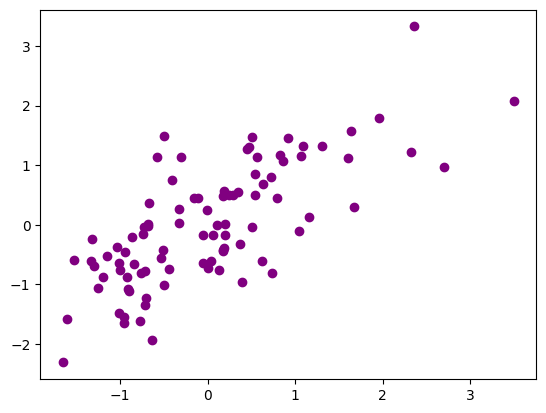

In [87]:
full_data = pd.read_csv('data.csv', delimiter=',')
n = len(full_data)
mid_x = np.sum(full_data['MajorAxisLength'])/n
mid_y = np.sum(full_data['MinorAxisLength'])/n
sigma_square_x = np.sum((full_data['MajorAxisLength'] - mid_x)**2)/n
sigma_square_y = np.sum((full_data['MinorAxisLength'] - mid_y)**2)/n
sigma_x = sigma_square_x**0.5
sigma_y = sigma_square_y**0.5
x_normalized = (full_data['MajorAxisLength'] - mid_x)/sigma_x
y_normalized = (full_data['MinorAxisLength'] - mid_y)/sigma_y
data_normalized = pd.DataFrame({'X': x_normalized, 'Y': y_normalized})
plt.scatter(data_normalized['X'], data_normalized['Y'], color='purple')
plt.show()

### Задание 2.
Определить «грубую» верхнюю оценку количества кластеров $\widetilde{k}$.

In [88]:
k = math.floor((n/2)**0.5)
print(f'«Грубая» верхняя оценка: {k} кластеров.')

«Грубая» верхняя оценка: 6 кластеров.


### Задание 3.
Реализовать алгоритм k-means. Отобразить полученные кластеры, каждый кластер выделить разным цветом или маркером, отметить центроиды.

In [89]:
def distance(first_point, second_point):
    return (np.sum((first_point - second_point)**2))**0.5

In [90]:
def k_means(k, initialData, epsilon, needScatter=False):
    data = initialData.to_numpy()
    x_min_max = [min(data[:, 0]), max(data[:, 0])]
    y_min_max = [min(data[:, 1]), max(data[:, 1])]
    len_x = x_min_max[1] - x_min_max[0]
    len_y = y_min_max[1] - y_min_max[0]
    centroids = np.array(pd.DataFrame(data=[[x_min_max[0]+len_x/(k-1)*i, y_min_max[0]+len_y/(k-1)*i] for i in range(k)] if k!=1 else [[x_min_max[0]+len_x/2, y_min_max[0]+len_y/2]], columns=['X', 'Y']))
    centroids_sum = pd.DataFrame({'SumX': np.zeros(len(centroids)), 'SumY': np.zeros(len(centroids)), 'Amount': np.zeros(len(centroids), dtype=int)})
    max_diff = epsilon
    count = 0
    while True:
        scatter = 0
        clusters = []
        for i in range(len(data)):
            closest_centroid_dist = distance(data[i], centroids[0])
            current_centroid = 0
            for j in range(1, len(centroids)):
                centroid_dist = distance(data[i], centroids[j])
                if centroid_dist < closest_centroid_dist:
                    closest_centroid_dist = centroid_dist
                    current_centroid = j
            clusters.append(current_centroid)
            centroids_sum.loc[current_centroid] = [centroids_sum.loc[current_centroid, 'SumX'] + data[i][0], centroids_sum.loc[current_centroid, 'SumY'] + data[i][1], centroids_sum.loc[current_centroid, 'Amount'] + 1]
            scatter += closest_centroid_dist
        if max_diff < epsilon or count >= 1000:
            break
        centroids_old = centroids.copy()
        for i in range(len(centroids)):
            centroids[i] = [centroids_sum.loc[i, 'SumX']/centroids_sum.loc[i, 'Amount'], centroids_sum.loc[i, 'SumY']/centroids_sum.loc[i, 'Amount']] if centroids_sum.loc[i, 'Amount'] != 0 else centroids[i]
        max_diff = distance(centroids_old[0], centroids[0])
        for i in range(1, len(centroids)):
            centroids_diff = distance(centroids_old[i], centroids[i])
            if centroids_diff > max_diff:
                max_diff = centroids_diff
        count+=1
        for col in centroids_sum.columns:
                centroids_sum[col].values[:] = 0
    data = pd.DataFrame({'X': data[:, 0], 'Y': data[:, 1], 'Centroid': clusters})
    centroids = pd.DataFrame({'X': centroids[:, 0], 'Y': centroids[:, 1]})
    return [data, centroids, scatter] if needScatter==True else [data, centroids]

In [91]:
def drawKmeansGraph(data_with_centroids, centroids):
    plt.figure(figsize=(8, 8))
    for i in range(len(centroids)):
        cluster = data_with_centroids.loc[data_with_centroids['Centroid'] == i]
        plt.scatter(cluster['X'], cluster['Y'])
    plt.scatter(centroids['X'], centroids['Y'], marker='X', s=80, c='black')
    plt.title(f'Результат работы k-means при k={len(centroids)}')
    plt.show()

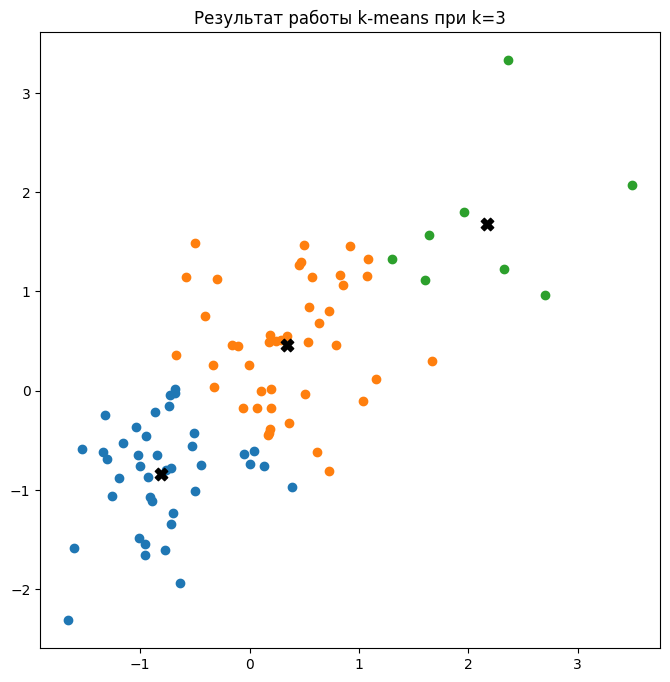

In [92]:
[data_with_centroids, centroids] = k_means(3, data_normalized, 0.01)
drawKmeansGraph(data_with_centroids, centroids)

### Задание 4.
Реализовать алгоритмы k-medians (для нечётных вариантов) и k-medoids (для чётных вариантов). Отобразить полученные кластеры, каждый кластер выделить разным цветом или маркером, отметить центроиды.

In [93]:
def k_medoids(k, initialData, needScatter=False):
    def rearrange_countCost(data, medoids):
        data = data.copy()
        cost = 0
        for i in range(len(data)):
            closest_medoid_dist = distance(data[i, [0, 1]], data[medoids[0], [0, 1]])
            data[i, 2] = medoids[0]
            for j in range(1, len(medoids)):
                medoid_dist = distance(data[i, [0, 1]], data[medoids[j], [0, 1]])
                if medoid_dist < closest_medoid_dist:
                    closest_medoid_dist = medoid_dist
                    data[i, 2] = medoids[j]
            cost += closest_medoid_dist
        return [data, cost]

    data_sorted = initialData.copy().sort_values(by='X').reset_index(drop=True)
    data_sorted['Medoid'] = ''
    data_sorted['Index'] = data_sorted.index
    data_sorted = data_sorted.to_numpy()
    step = math.floor(len(data_sorted)/(k+1))
    medoids = [step*i for i in range(1, k+1)]
    [data_sorted, min_cost] = rearrange_countCost(data_sorted, medoids)
    while True:
        option_found = False
        new_medoids = medoids[:]
        for i in range(len(medoids)):
            medoid_elements = np.delete(data_sorted.copy(), medoids[i], axis=0)
            medoid_elements = medoid_elements[medoid_elements[:, 2] == medoids[i]]
            for j in medoid_elements[:, 3]:
                new_medoids[i] = j
                [rearranged_data, cost] = rearrange_countCost(data_sorted, new_medoids)
                if cost < min_cost:
                    min_cost = cost
                    best_option = rearranged_data
                    better_medoids = new_medoids[:]
                    option_found = True
            new_medoids[i] = medoids[i]
        if option_found == False:
            break
        data_sorted = best_option
        medoids = better_medoids
    data_sorted = pd.DataFrame({'X': data_sorted[:, 0], 'Y': data_sorted[:, 1], 'Medoid': data_sorted[:, 2]})
    return [data_sorted, medoids, min_cost] if needScatter==True else [data_sorted, medoids]

In [94]:
def drawKmedoidsGraph(data_with_medoids, medoids):
    medoid_dots = pd.DataFrame(columns=['X', 'Y'])
    plt.figure(figsize=(8, 8))
    for i in range(len(medoids)):
        cluster = data_with_medoids.loc[data_with_medoids['Medoid'] == medoids[i]]
        plt.scatter(cluster['X'], cluster['Y'])
        medoid_dots.loc[i] = data_with_medoids.loc[medoids[i], ['X', 'Y']]
    plt.scatter(medoid_dots['X'], medoid_dots['Y'], marker='X', s=80, c='black')
    plt.title(f'Результат работы k-medoids при k={len(medoids)}')
    plt.show()

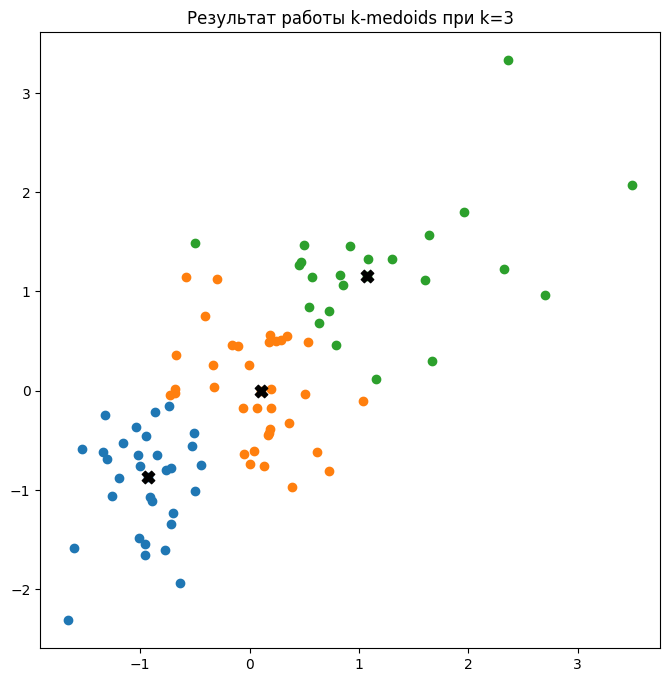

In [95]:
[data_with_medoids, medoids] = k_medoids(3, data_normalized)
drawKmedoidsGraph(data_with_medoids, medoids)

### Задание 5.
Для каждого метода заполнить следующую таблицу, где значения ${k}$ изменяются от 1 до $\widetilde{k}$.

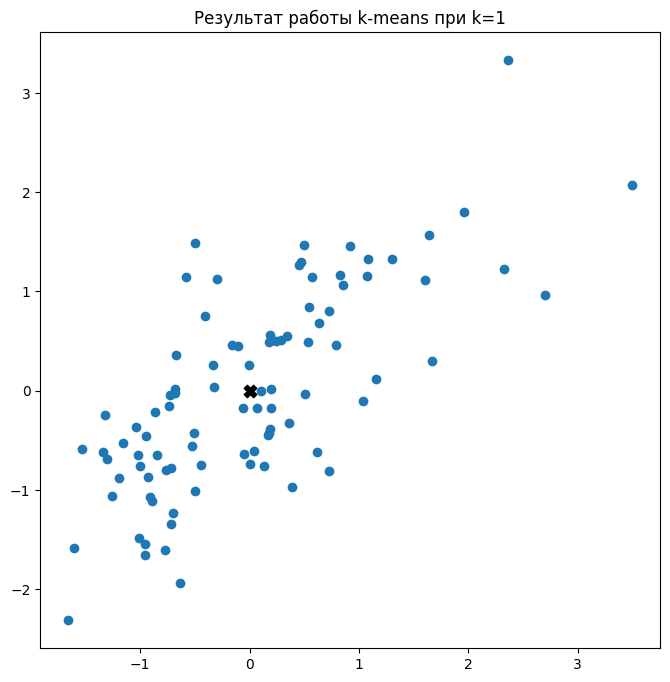

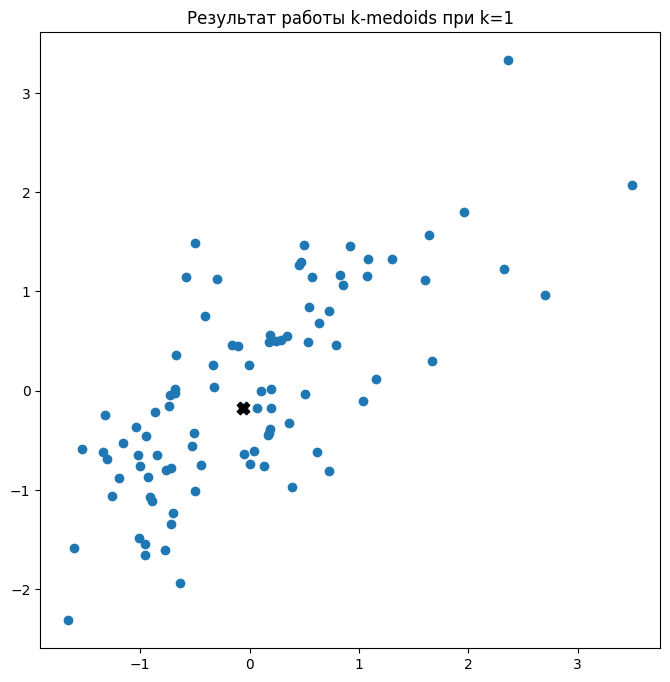

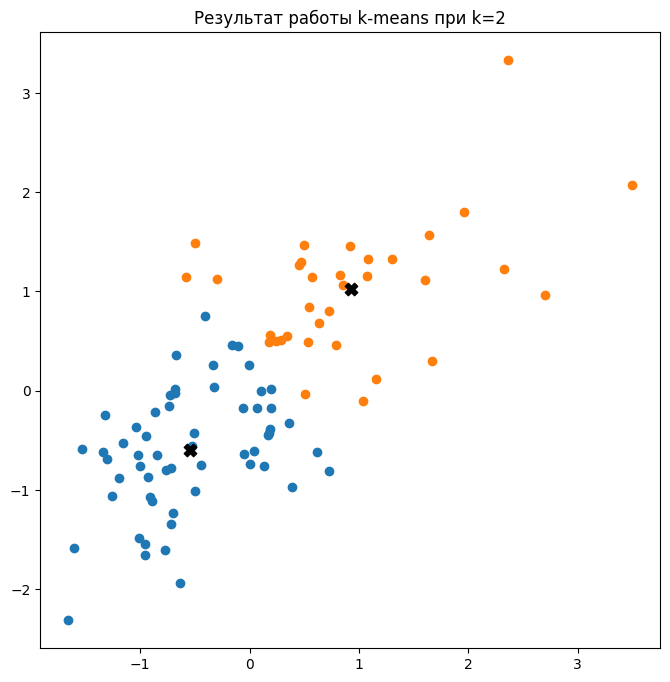

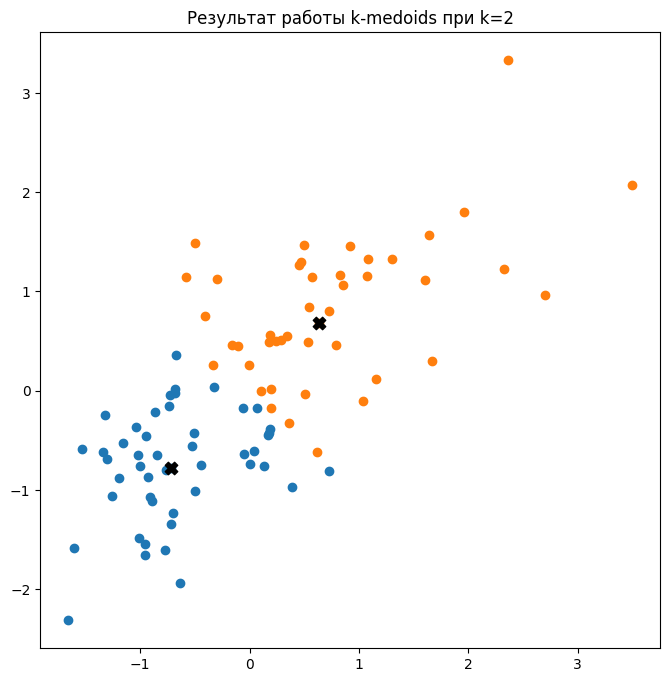

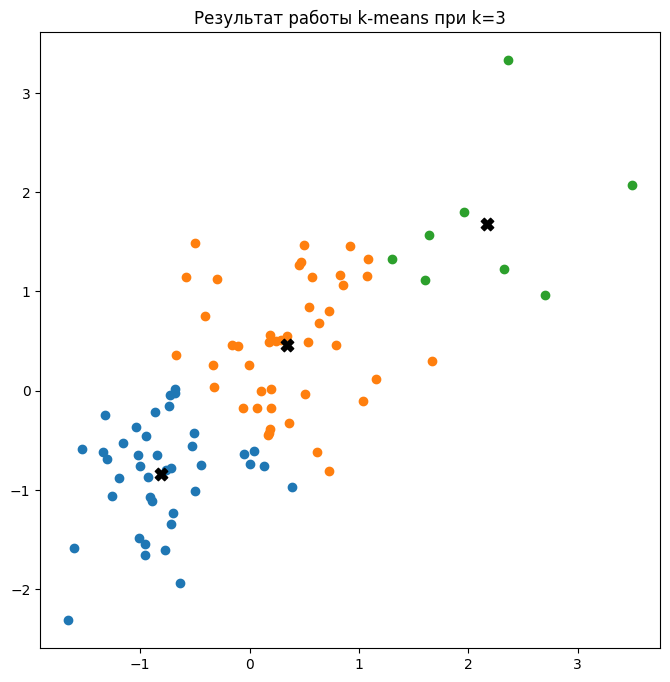

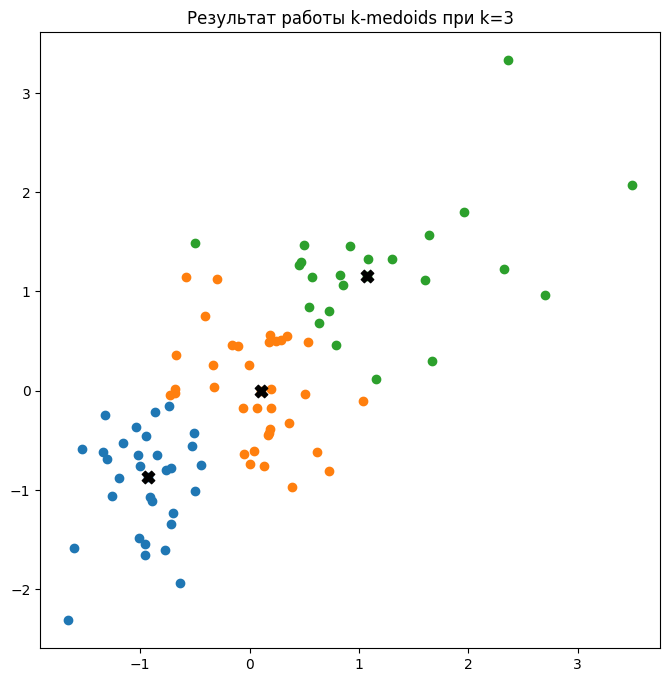

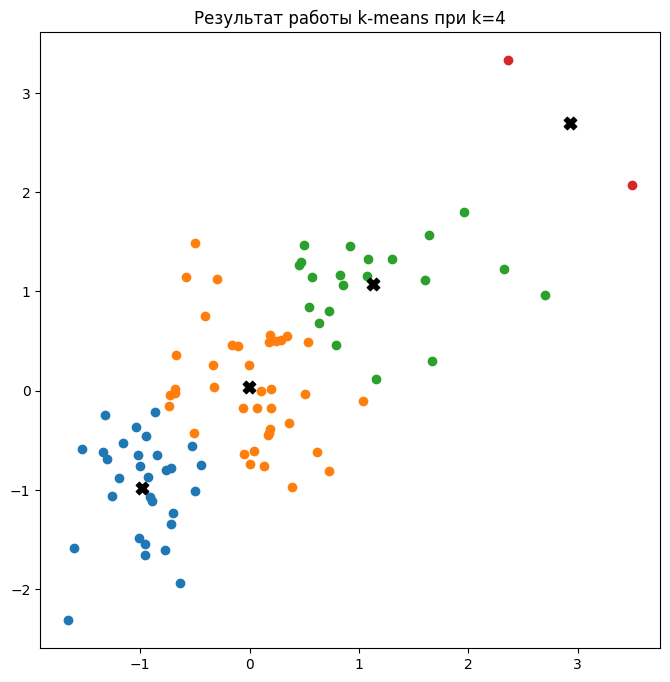

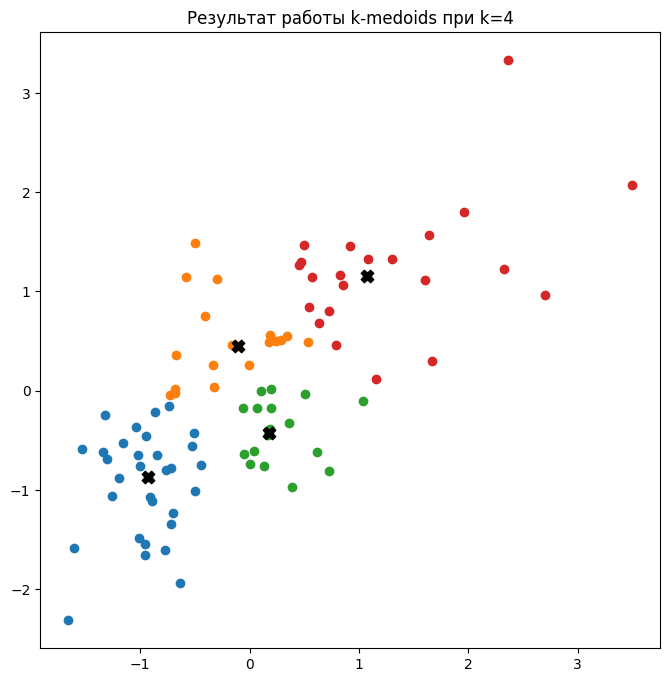

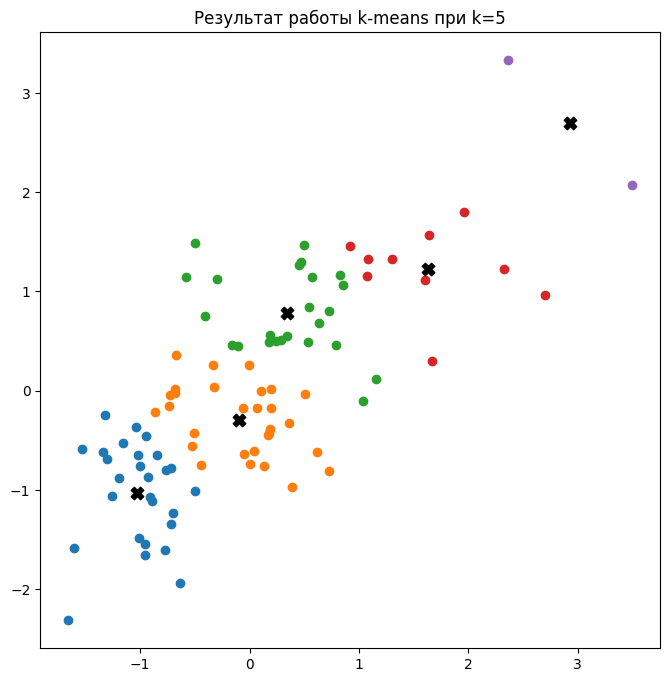

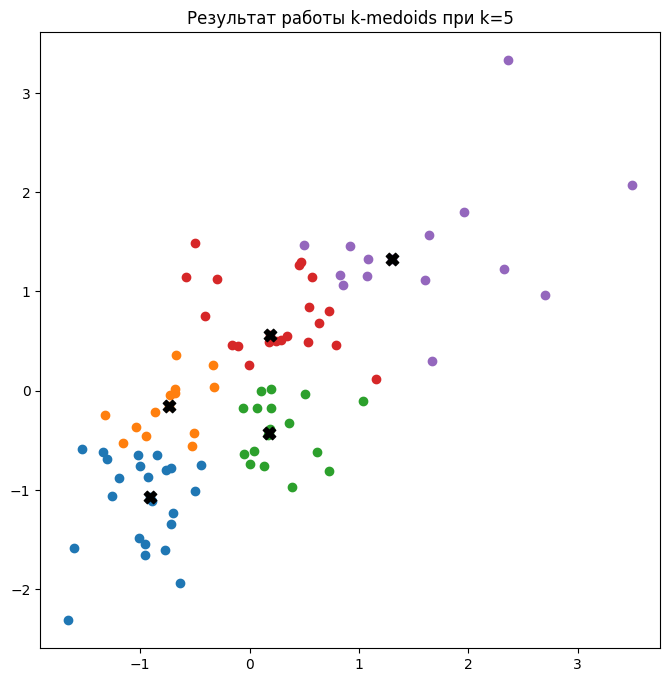

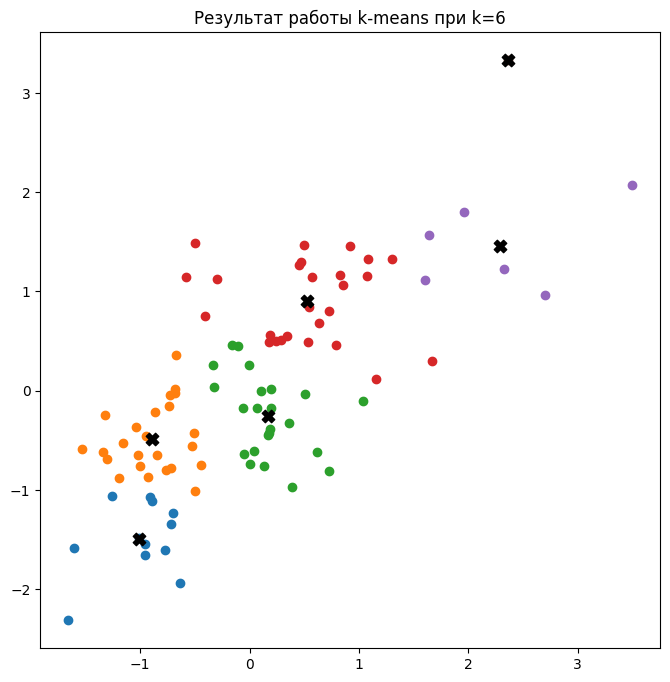

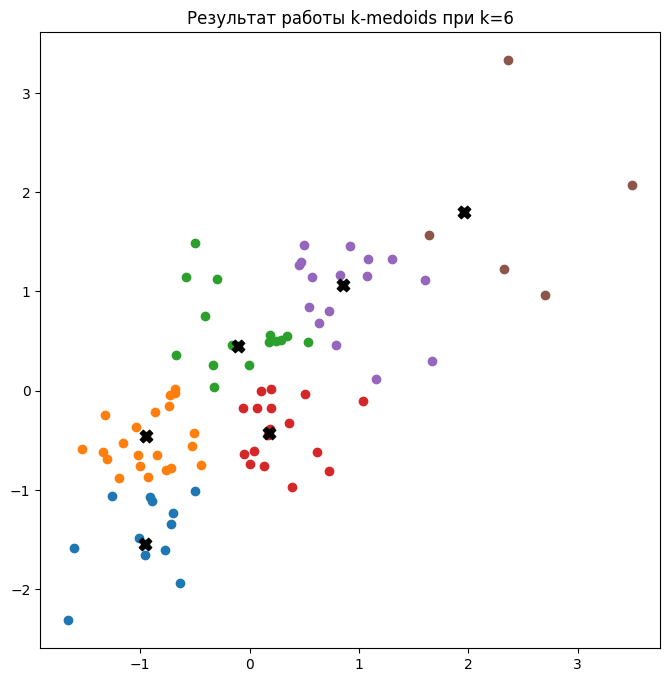

In [96]:
tableK_means = pd.DataFrame(columns=['Значение k', 'Центроиды кластера X_C_i', 'Объём кластера #C_i'])
tableK_medoids = pd.DataFrame(columns=['Значение k', 'Медоиды кластера X_C_i', 'Объём кластера #C_i'])
scatterK_means = []
scatterK_medoids = []
for i in range(1, k+1):
    [dataK_means, centroidsK_means, scatter] = k_means(i, data_normalized, 0.01, True)
    drawKmeansGraph(dataK_means, centroidsK_means)
    scatterK_means.append(scatter)
    [dataK_medoids, centroidsK_medoids, scatter] = k_medoids(i, data_normalized, True)
    drawKmedoidsGraph(dataK_medoids, centroidsK_medoids)
    scatterK_medoids.append(scatter)
    for j in range(i):
        tableK_means.loc[len(tableK_means)] = [i, f"[{round(centroidsK_means.loc[j, 'X'], 5)}, {round(centroidsK_means.loc[j, 'Y'], 5)}]", len(dataK_means.loc[dataK_means['Centroid'] == j])]
        tableK_medoids.loc[len(tableK_medoids)] = [i, f"[{round(dataK_medoids.loc[centroidsK_medoids[j], 'X'], 5)}, {round(dataK_medoids.loc[centroidsK_medoids[j], 'Y'], 5)}]", len(dataK_medoids.loc[dataK_medoids['Medoid'] == centroidsK_medoids[j]])]

Таблица для метода k-means:

In [97]:
display(tableK_means.style.hide(axis='index'))

Значение k,Центроиды кластера X_C_i,Объём кластера #C_i
1,"[-0.0, -0.0]",92
2,"[-0.54499, -0.59783]",58
2,"[0.92969, 1.01982]",34
3,"[-0.8088, -0.84291]",40
3,"[0.33985, 0.46154]",44
3,"[2.17485, 1.67612]",8
4,"[-0.98433, -0.97924]",30
4,"[-0.00357, 0.03637]",39
4,"[1.13362, 1.07401]",21
4,"[2.93169, 2.70233]",2


Таблица для метода k-medoids:

In [98]:
display(tableK_medoids.style.hide(axis='index'))

Значение k,Медоиды кластера X_C_i,Объём кластера #C_i
1,"[-0.05632, -0.17146]",92
2,"[-0.71804, -0.77842]",48
2,"[0.63106, 0.68639]",44
3,"[-0.92608, -0.87207]",32
3,"[0.1048, -0.00758]",36
3,"[1.06987, 1.15253]",24
4,"[-0.92608, -0.87207]",32
4,"[-0.10764, 0.44786]",19
4,"[0.17865, -0.422]",18
4,"[1.06987, 1.15253]",23


### Задание 6.
С помощью метода силуэтов (для нечётных вариантов) и метода локтя (для чётных вариантов) выявить для каждого метода оптимальное количество кластеров.

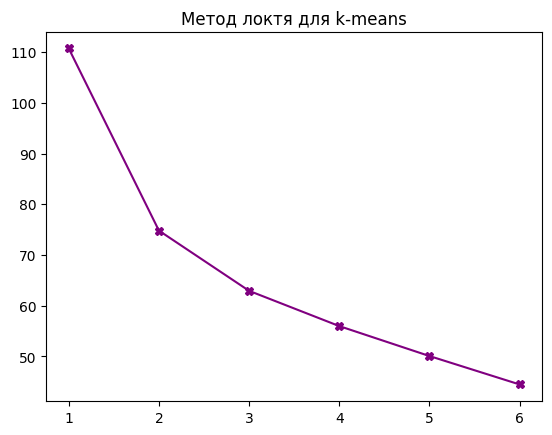

In [99]:
plt.plot([i+1 for i in range(k)], scatterK_means, c='purple', marker='X')
plt.title('Метод локтя для k-means')
plt.show()

Оптимальное количество кластеров для метода k-means - 2 кластера.

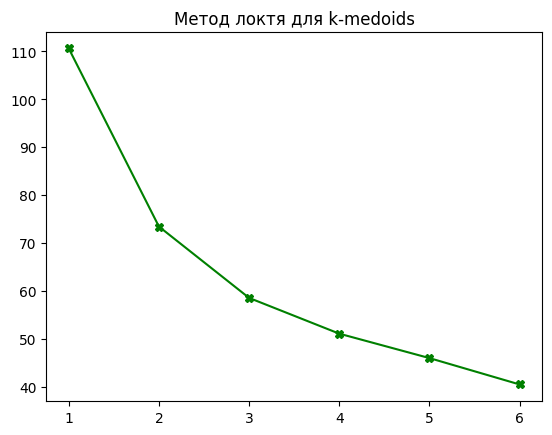

In [100]:
plt.plot([i+1 for i in range(k)], scatterK_medoids, c='green', marker='X')
plt.title('Метод локтя для k-medoids')
plt.show()

Оптимальное количество кластеров для метода k-medoids - 3 кластера.

### Задание 7.
Реализовать алгоритм поиска сгущений при различных радиусах $R$, отобразить полученные кластеры, выделить каждый кластер разным цветом или маркером, отметить центроиды. Результаты представить в виде таблицы.

In [101]:
def calculateR(amount):
    matrix = np.full((len(data_normalized), len(data_normalized)), 0, dtype=float)
    for i in range(len(data_normalized) - 1):
        for j in range(i+1, len(data_normalized)):
            matrix[i][j] = matrix[j][i] = distance(data_normalized.loc[i], data_normalized.loc[j])
    R_min = matrix[np.nonzero(matrix)].min()
    R_max = matrix[np.nonzero(matrix)].max()
    length = (R_max - R_min)*0.4
    R_array = np.array([R_min + length/(amount+1)*i for i in range(2, amount+2)])
    return R_array

In [102]:
def FOREL(initialData, R):
    data = initialData.copy()
    data['Centroid'] = -1
    data['Index'] = data.index
    data = data.to_numpy()
    centroidNumber = 0
    centroidsArray = []
    while True:
        lonelyPoints = data[data[:, 2] == -1]
        if len(lonelyPoints) == 0:
            break
        centroid = lonelyPoints[random.randint(0, len(lonelyPoints) - 1), [0, 1]]
        while True:
            pointsInRadius = []
            for point in lonelyPoints:
                if distance(point[[0, 1]], centroid) <= R:
                    pointsInRadius.append(point)
            amount = len(pointsInRadius)
            pointsInRadius = np.array(pointsInRadius)
            newCentroid = np.array([np.sum(pointsInRadius[:, 0])/amount, np.sum(pointsInRadius[:, 1])/amount])
            if distance(centroid, newCentroid) == 0:
                centroidsArray.append(centroid)
                data[pointsInRadius[:, 3].astype(int), 2] = centroidNumber
                centroidNumber += 1
                break
            centroid = newCentroid
    data = pd.DataFrame({'X': data[:, 0], 'Y': data[:, 1], 'Centroid': data[:, 2]})
    centroidsArray = np.array(centroidsArray)
    centroidsArray = pd.DataFrame({'X': centroidsArray[:, 0], 'Y': centroidsArray[:, 1]})
    return [data, centroidsArray]

In [103]:
def printSpheres(data, radius):
    angle = np.linspace(0, 2*np.pi, 200)
    plt.figure(figsize=(6,6))
    plt.gca().set_aspect('equal')
    clusterVolume = []
    [data_spheres, centroidsSpheres] = FOREL(data, radius)
    for i in range(len(centroidsSpheres)):
        sphere_points = data_spheres.loc[data_spheres['Centroid'] == i]
        clusterVolume.append(len(sphere_points))
        plt.scatter(sphere_points['X'], sphere_points['Y'])
        plt.plot(radius * np.cos(angle) + centroidsSpheres.loc[i, 'X'], radius * np.sin(angle) + centroidsSpheres.loc[i, 'Y'])
    plt.scatter(centroidsSpheres['X'], centroidsSpheres['Y'], marker='x', s=60, c='black')
    plt.title(f'График при R={radius}\n Количество сфер: {len(centroidsSpheres)}')
    plt.show()
    return [centroidsSpheres, clusterVolume]

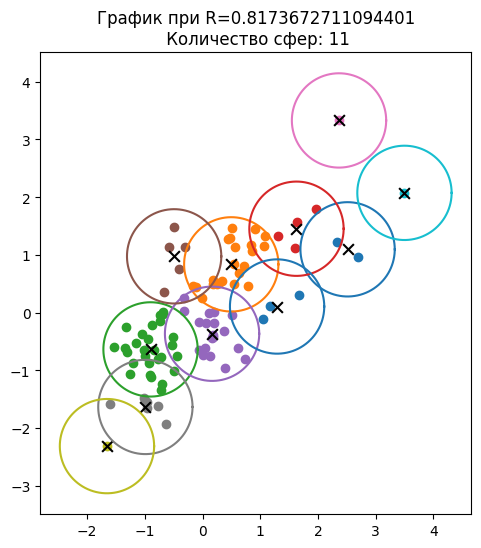

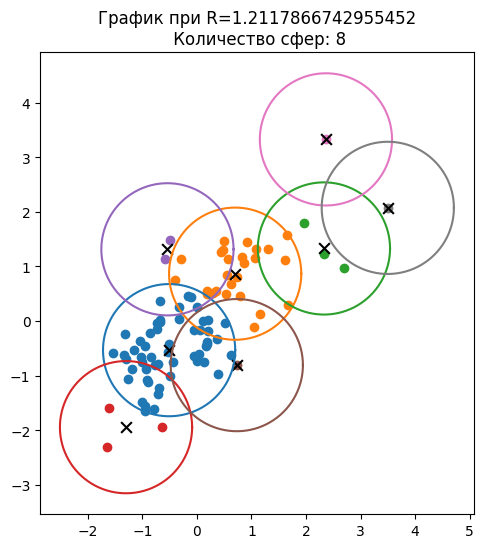

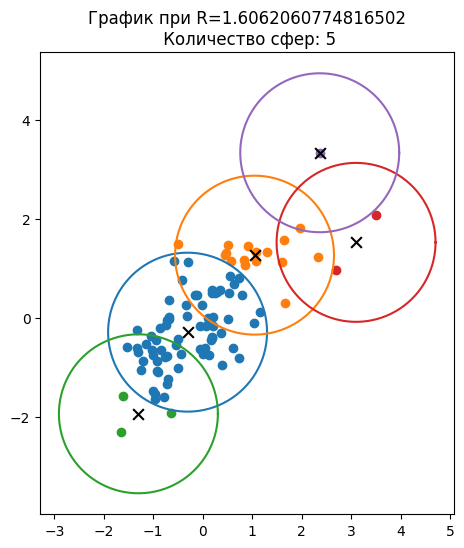

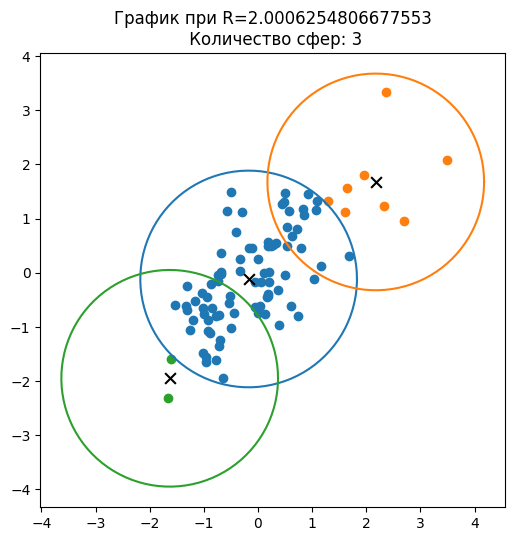

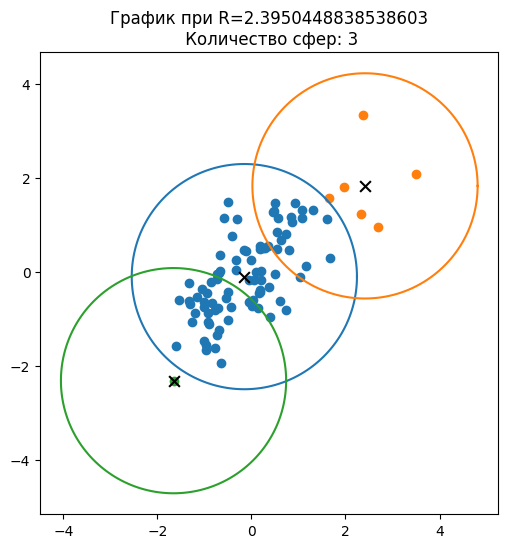

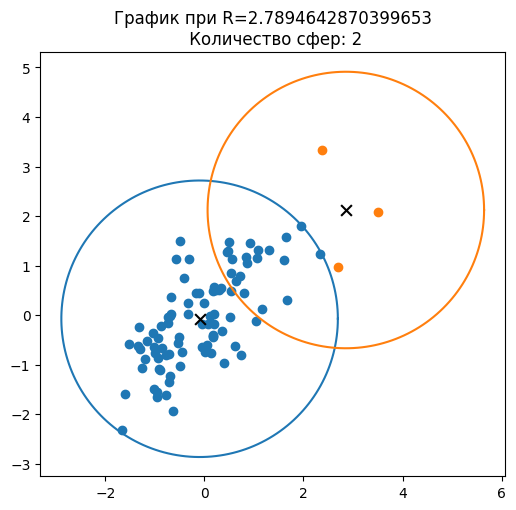

In [104]:
R_array = calculateR(6)
tableSpheres = pd.DataFrame(columns=['Значение R', 'Центроиды кластера X_C_i', 'Объём кластера #C_i'])
for radius in R_array:
    [centroidsSpheres, clusterVolume] = printSpheres(data_normalized, radius)
    for i in range(len(centroidsSpheres)):
        tableSpheres.loc[len(tableSpheres)] = [radius, f"[{round(centroidsSpheres.loc[i, 'X'], 5)}; {round(centroidsSpheres.loc[i, 'Y'], 5)}]", clusterVolume[i]]

In [105]:
display(tableSpheres.style.hide(axis='index'))

Значение R,Центроиды кластера X_C_i,Объём кластера #C_i
0.817367,[2.51319; 1.09594],2
0.817367,[0.49709; 0.83562],22
0.817367,[-0.90213; -0.63846],28
0.817367,[1.62726; 1.4531],4
0.817367,[0.16431; -0.36703],19
0.817367,[-0.49296; 0.9745],5
0.817367,[2.36461; 3.32992],1
0.817367,[-0.99147; -1.63577],6
0.817367,[-1.65721; -2.31472],1
0.817367,[3.49877; 2.07473],1


### Задание 8.
Проверить чувствительность метода поиска сгущений к погрешностям. Сделать выводы.

Для $\epsilon=0.001$:

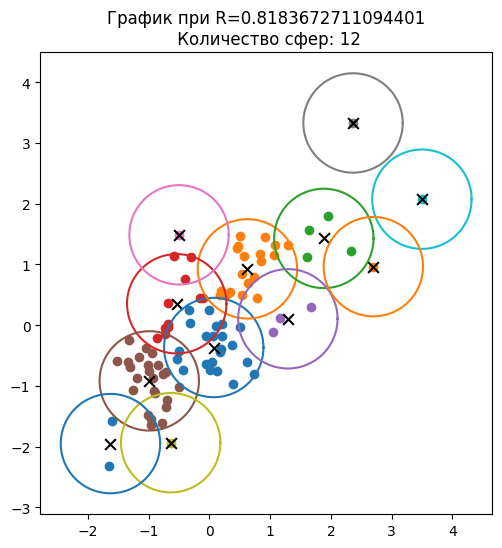

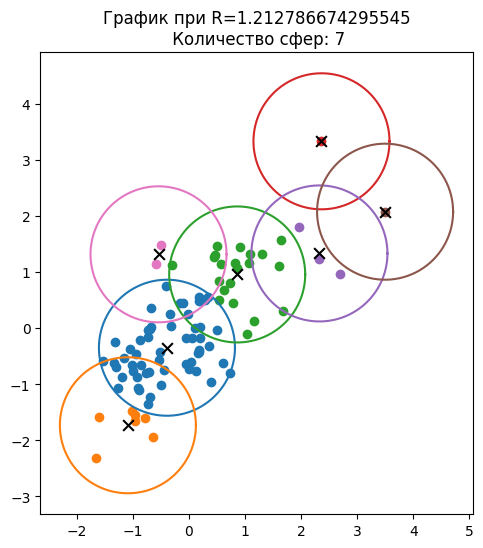

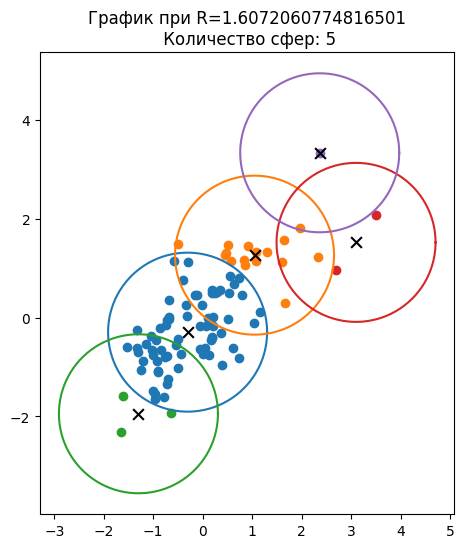

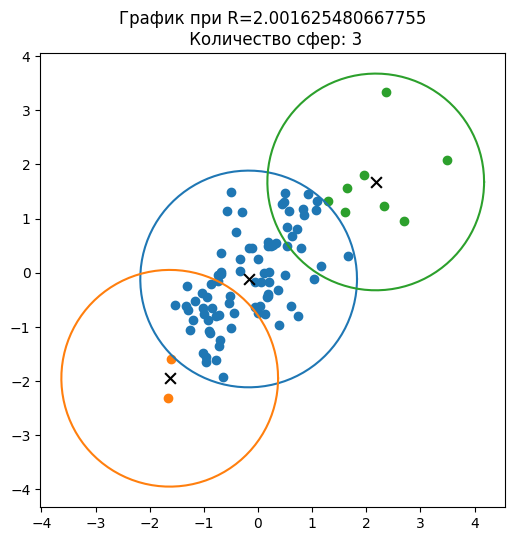

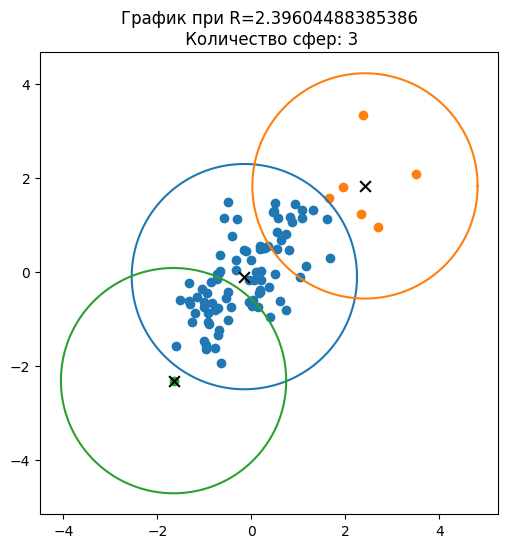

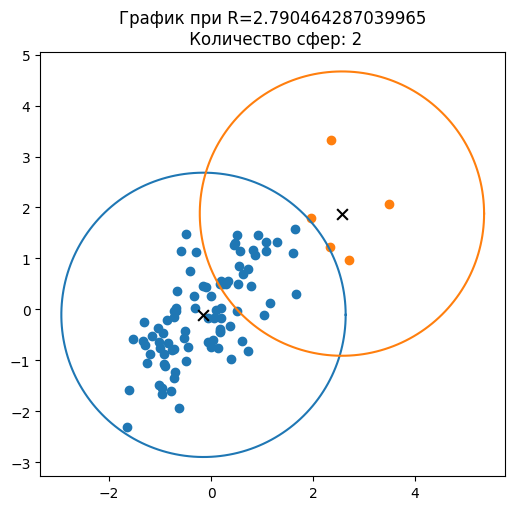

Значение R,Центроиды кластера X_C_i,Объём кластера #C_i
0.818367,[0.07102; -0.36779],23
0.818367,[0.62558; 0.92764],20
0.818367,[1.8837; 1.42876],4
0.818367,[-0.53885; 0.35237],11
0.818367,[1.2913; 0.10493],3
0.818367,[-0.99122; -0.91745],24
0.818367,[-0.50073; 1.48751],1
0.818367,[2.36461; 3.32992],1
0.818367,[-0.63833; -1.93592],1
0.818367,[3.49877; 2.07473],1


In [106]:
tableSpheres = pd.DataFrame(columns=['Значение R', 'Центроиды кластера X_C_i', 'Объём кластера #C_i'])
for radius in R_array:
    radius+=0.001
    [centroidsSpheres, clusterVolume] = printSpheres(data_normalized, radius)
    for i in range(len(centroidsSpheres)):
        tableSpheres.loc[len(tableSpheres)] = [radius, f"[{round(centroidsSpheres.loc[i, 'X'], 5)}; {round(centroidsSpheres.loc[i, 'Y'], 5)}]", clusterVolume[i]]
display(tableSpheres.style.hide(axis='index'))

Для $\epsilon=0.0001$:

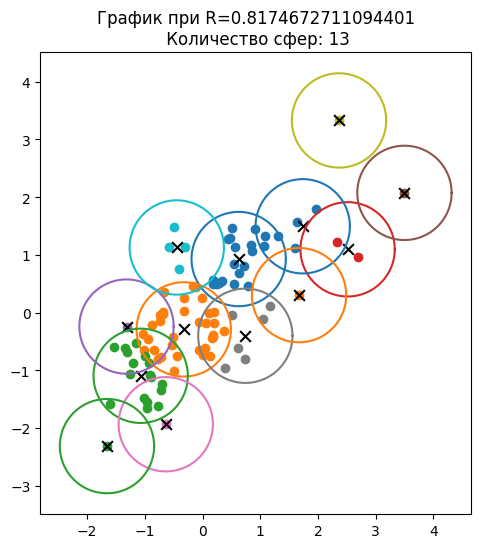

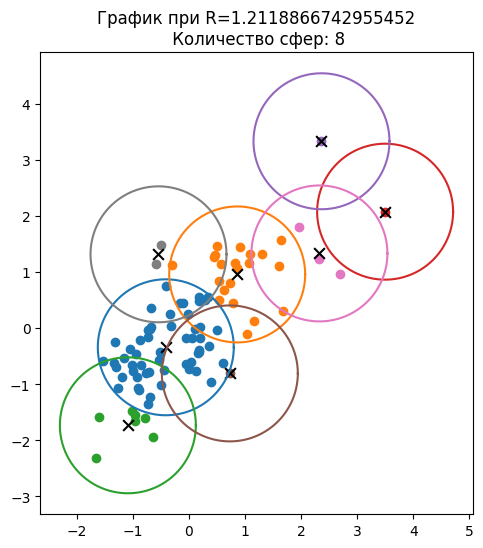

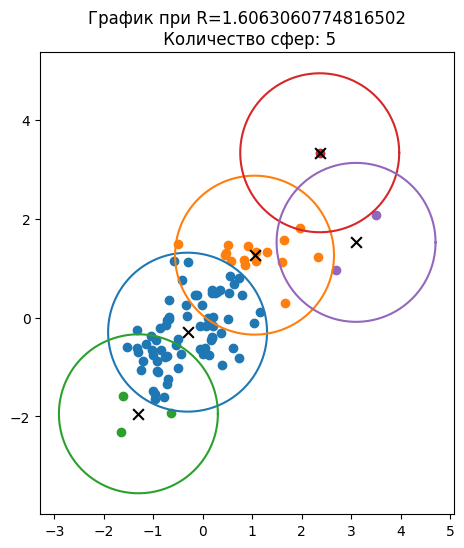

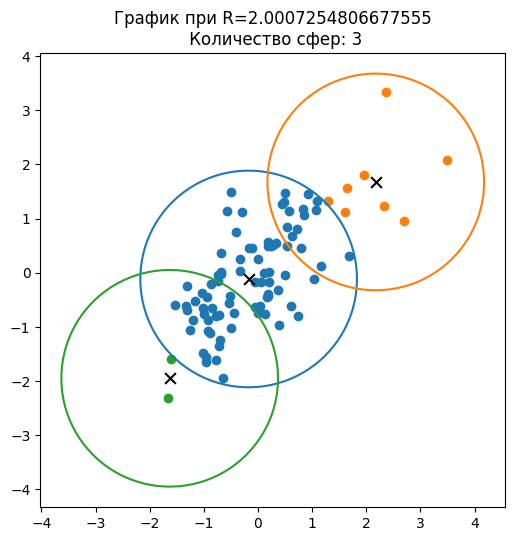

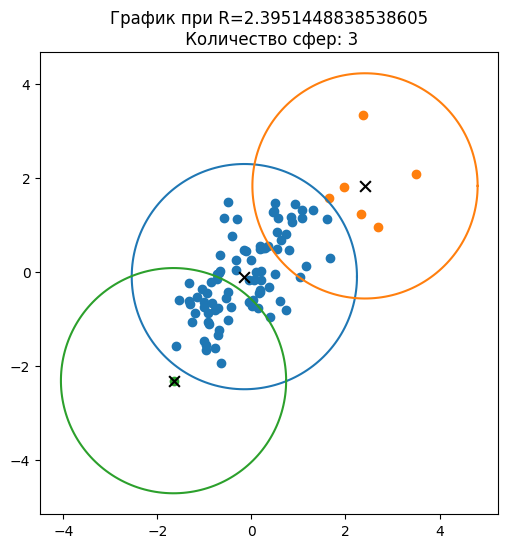

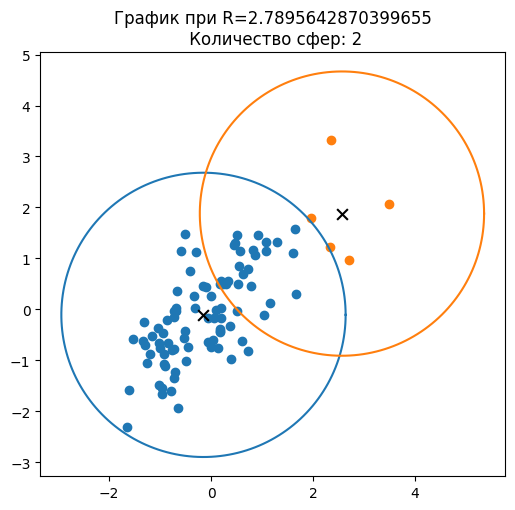

Значение R,Центроиды кластера X_C_i,Объём кластера #C_i
0.817467,[0.62558; 0.92764],20
0.817467,[-0.32582; -0.2915],34
0.817467,[-1.07323; -1.09613],17
0.817467,[2.51319; 1.09594],2
0.817467,[-1.3187; -0.24291],1
0.817467,[3.49877; 2.07473],1
0.817467,[-0.63833; -1.93592],1
0.817467,[0.74099; -0.40193],6
0.817467,[2.36461; 3.32992],1
0.817467,[-0.44751; 1.12817],4


In [107]:
tableSpheres = pd.DataFrame(columns=['Значение R', 'Центроиды кластера X_C_i', 'Объём кластера #C_i'])
for radius in R_array:
    radius+=0.0001
    [centroidsSpheres, clusterVolume] = printSpheres(data_normalized, radius)
    for i in range(len(centroidsSpheres)):
        tableSpheres.loc[len(tableSpheres)] = [radius, f"[{round(centroidsSpheres.loc[i, 'X'], 5)}; {round(centroidsSpheres.loc[i, 'Y'], 5)}]", clusterVolume[i]]
display(tableSpheres.style.hide(axis='index'))

Метод поиска сгущений чувствителен к погрешностям, но лишь при малых радиусах. 
При бóльших радиусах метод становится нечувствителен к погрешностям.

### Задание 9.
Сравнить методы. Сделать выводы.

Метод k-medoids оказался лучше метода k-means. Составленные графики показывают, что при одинаковых количествах кластеров разброс внутри кластеров по методу k-medoids меньше, чем по методу k-means. Оба алгоритма справились со своей работой и успешно разбили выборку на кластеры.    

Метод поиска сгущений оказался неэффективен для данной выборки. При малых радиусах итогом является очень большое число кластеров. А при бóльших радиусах подавляющее большинство точек оказывается в одном кластере. Оставшиеся немногочисленные точки либо сбиваются в небольшие кластеры, либо являются единственными представителями кластера. Также имеет место быть постоянное наложение кластеров. Для данной выборки данный метод неэффективен.

## Выводы
При выполнении данной практической работы было выполнено разбиение исходного множества объектов на конечное число подмножеств
(кластеров) с использованием методов k-means и k-medoids, а также с использованием метода поиска сгущений при нескольких значениях радиусов. Для методов k-means и k-medoids была произведена верхняя грубая оценка количества кластеров. Затем с помощью метода локтя было оценено оптимальное число кластеров для этих методов. У метода поиска сгущений была проверена чувствительность к погрешностям. Результаты были проинтерпретированы.